In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [4]:
df.drop(columns=['day','month','year'],inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [6]:
#encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df['Classes'].value_counts()


Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
#independent and independent 
X=df.drop('FWI',axis=1)
Y=df['FWI']

In [11]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [12]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [13]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

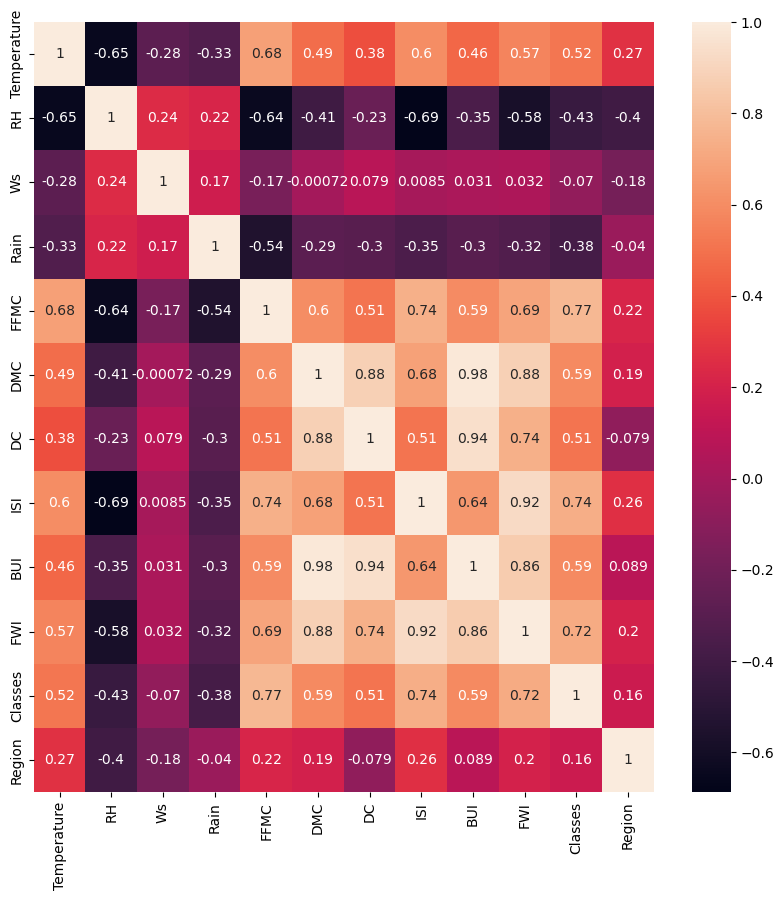

In [14]:
#check correlation
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [15]:
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [20]:
#drop highly corelated columns cuz they do not impact that much
def corelation(dataframe,thresold):
    corr_matrix=dataframe.corr()
    col_names=set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j])>thresold):
                col_name=corr_matrix.columns[i]
                col_names.add(col_name)
    return col_names

In [21]:
highly_corelated=corelation(df,0.85)
highly_corelated

{'BUI', 'DC', 'FWI'}

In [22]:
df.drop(highly_corelated,axis=1,inplace=True)

In [23]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0,0.0
1,29,61,13,1.3,64.4,4.1,1.0,0,0.0
2,26,82,22,13.1,47.1,2.5,0.3,0,0.0
3,25,89,13,2.5,28.6,1.3,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,1.2,0,0.0


In [24]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

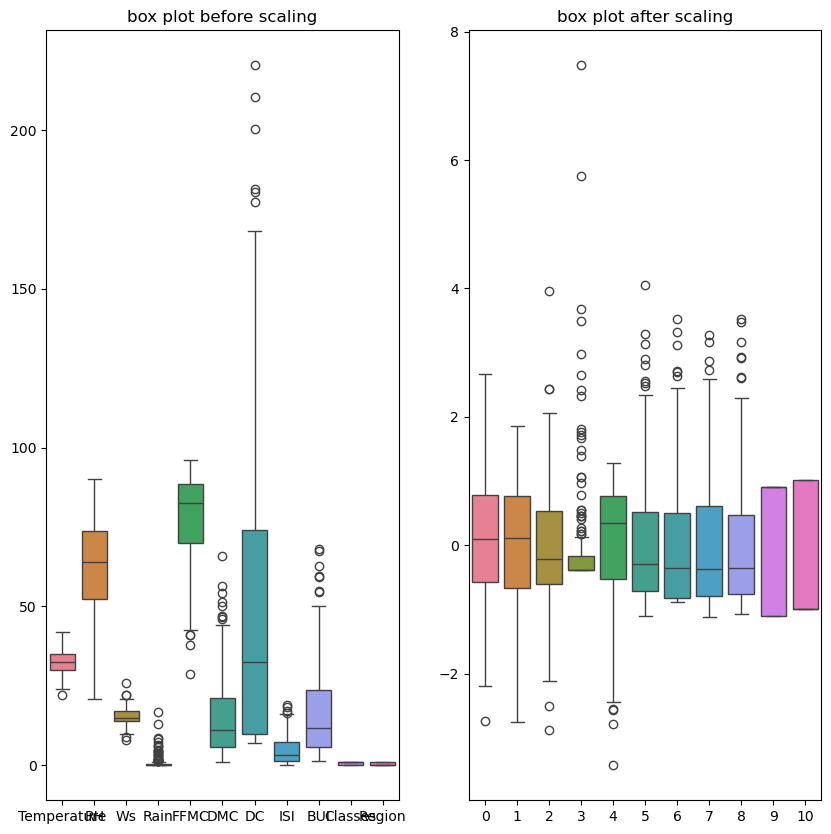

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('box plot before scaling')
sns.boxplot(x_train)
plt.subplot(1,2,2)
plt.title('box plot after scaling')
sns.boxplot(x_train_scaled)
plt.show()

In [43]:
#Linear regresion
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train_scaled,y_train)
y_pred=regression.predict(x_test_scaled)

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
score=r2_score(y_pred,y_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'r2_score : {score}')
print(f'mse : {mse}')
print(f'mae : {mae}')
print(f'rmse : {rmse}')


r2_score : 0.9887536295126629
mse : 0.46982435716885296
mae : 0.4654460800094099
rmse : 0.685437347369439


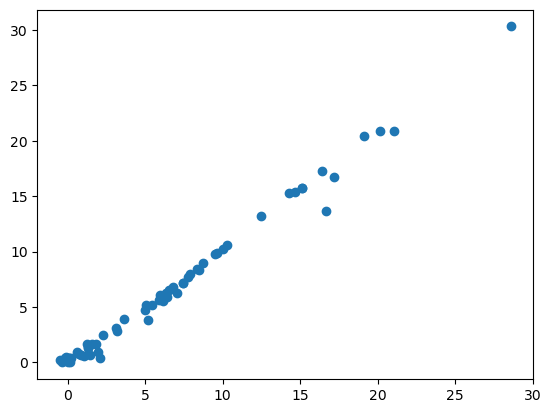

In [45]:
plt.scatter(y_pred,y_test)


In [46]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred_lasso=lasso.predict(x_test_scaled)
#evaluation metrics
score=r2_score(y_pred_lasso,y_test)
mse=mean_squared_error(y_test,y_pred_lasso)
mae=mean_absolute_error(y_test,y_pred_lasso)
rmse=np.sqrt(mse)
print(f'r2_score : {score}')
print(f'mse : {mse}')
print(f'mae : {mae}')
print(f'rmse : {rmse}')


r2_score : 0.9345633711703306
mse : 2.000058348289227
mae : 1.0816323165898816
rmse : 1.4142341914581287


In [48]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred_ridge=ridge.predict(x_test_scaled)
#evaluation metrics
score=r2_score(y_pred_ridge,y_test)
mse=mean_squared_error(y_test,y_pred_ridge)
mae=mean_absolute_error(y_test,y_pred_ridge)
rmse=np.sqrt(mse)
print(f'r2_score : {score}')
print(f'mse : {mse}')
print(f'mae : {mae}')
print(f'rmse : {rmse}')

r2_score : 0.9863760888668508
mse : 0.5677317795293659
mae : 0.5032856973416838
rmse : 0.7534797804383114


In [49]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred_elastic=elastic.predict(x_test_scaled)
#evaluation metrics
score=r2_score(y_pred_elastic,y_test)
mse=mean_squared_error(y_test,y_pred_elastic)
mae=mean_absolute_error(y_test,y_pred_elastic)
rmse=np.sqrt(mse)
print(f'r2_score : {score}')
print(f'mse : {mse}')
print(f'mae : {mae}')
print(f'rmse : {rmse}')

r2_score : 0.8443136699207925
mse : 4.396320516000338
mae : 1.6830954467418584
rmse : 2.096740450318145
